# kNN Classification

### 1. Import Libraries

In [14]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

### 2. Create Dataset - Binary classfication

<IPython.core.display.Javascript object>


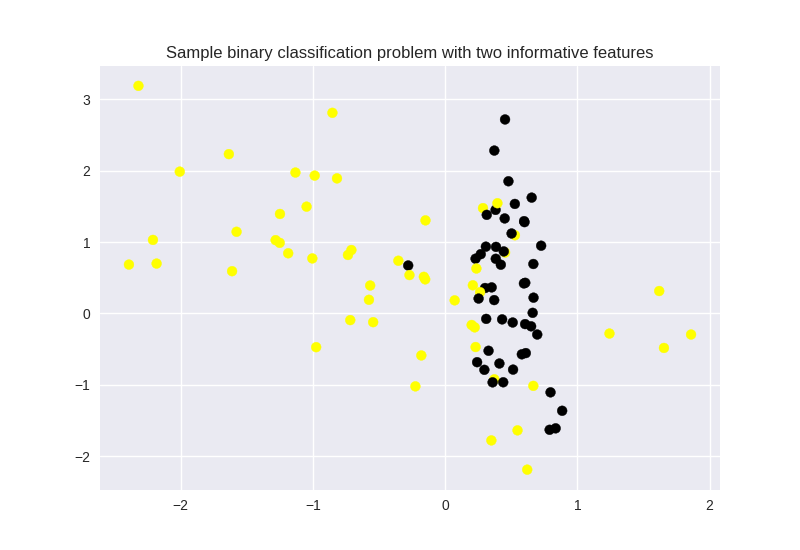

In [15]:
# synthetic dataset for classification (binary) 
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

### 3. Train-test split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 42)
print ('Training Set Dimensions : ', X_train.shape)
print ('Test Set Dimensions : ', X_test.shape)

Training Set Dimensions :  (75, 2)
Test Set Dimensions :  (25, 2)


### 4. knn Classifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

### 5. Accuracy

In [18]:
knn.predict(X_test)
# Test set accuracy
acc_test = knn.score(X_test, y_test)
acc_train = knn.score(X_train, y_train)

### 6. Accuracy Plot

In [19]:
acc_test = []
acc_train = []

for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    acc_test = np.append(acc_test, knn.score(X_test, y_test))
    acc_train = np.append(acc_train, knn.score(X_train, y_train))
    

<IPython.core.display.Javascript object>


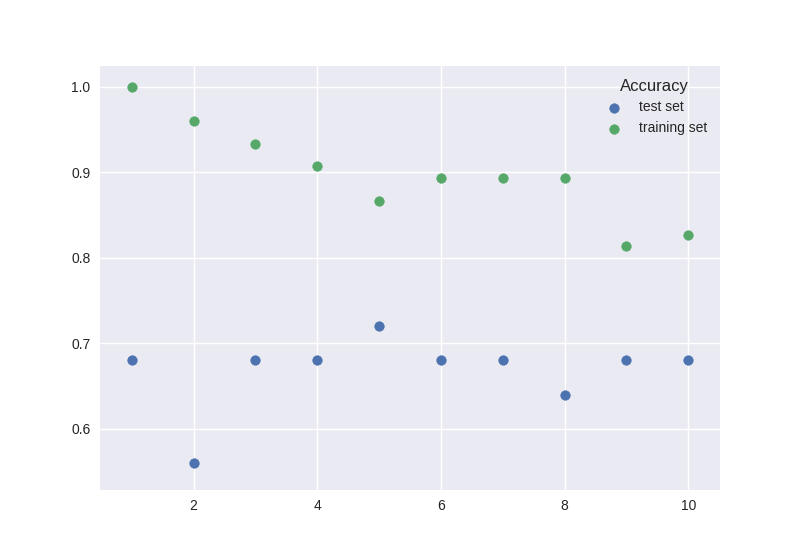

In [20]:
fig = plt.figure()
plt.scatter(range(1,11), acc_test)
plt.scatter(range(1,11), acc_train)
plt.legend(title = 'Accuracy', labels = ['test set','training set'])
plt.show()

<IPython.core.display.Javascript object>


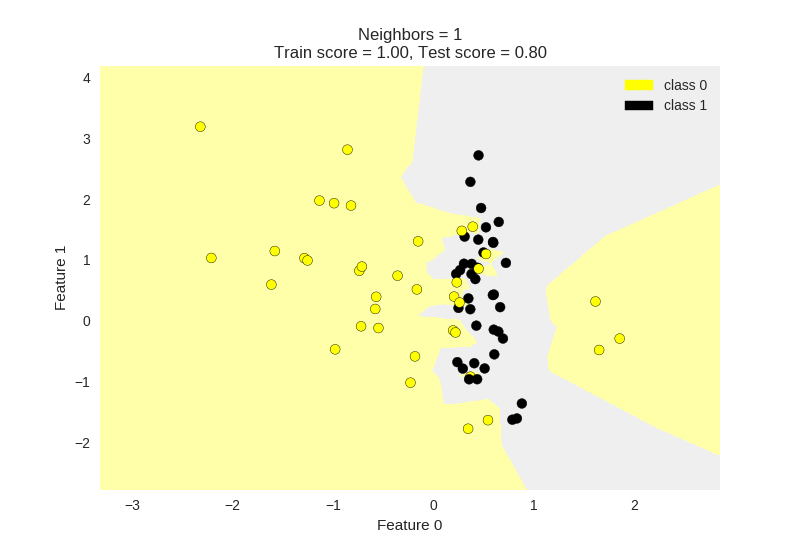

<IPython.core.display.Javascript object>


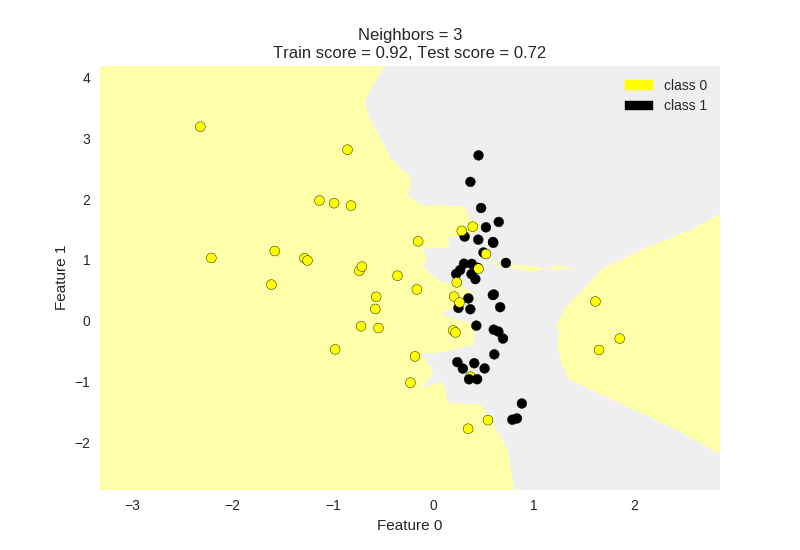

<IPython.core.display.Javascript object>


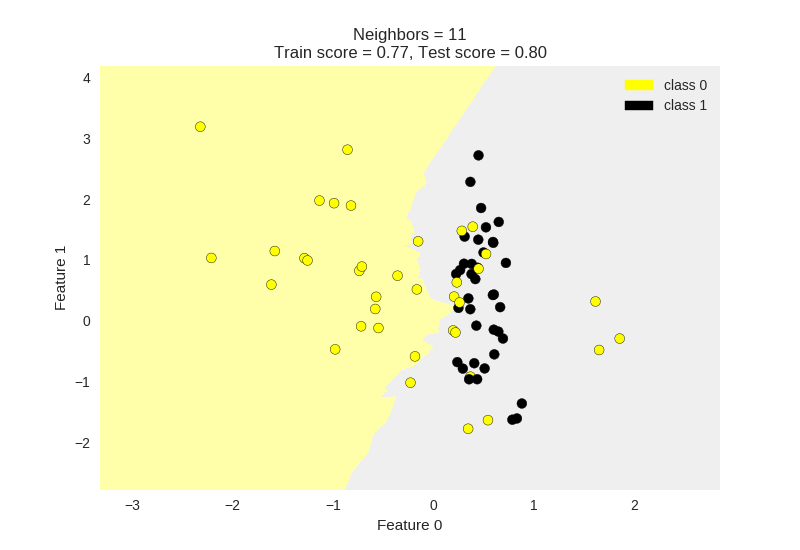

In [21]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)